I'm a long distance runnier in my private life, and in 2019 I ran for Reykjavik Marathon.
I was aiming to run under 3 hours (it's called "sub-3"), but I failed and ended up being a sub-4 runner for the marathon.
I was on a good pace even after the half point, but somewhere around 30k, I got cramps and lost speed.
As a tedency, do sub-3 runners maintain the same-level speed all the way through?
Or do they also have a slower pace around the same point as mine?
I'd love to check to become a stronger runner with some insights!

In [282]:
import pandas as pd

url = 'https://timataka.net/reykjavikurmarathon2019/urslit/?race=1&cat=overall' # Results from Reykjavik Marathon 2019
df = pandas.io.html.read_html(url)
df[0]

,Rank,BIB,Name,Unnamed: 3,YOB,Nat.,Club,Split,Time,Behind,Chiptime
0,1,1200,Arnar Pétursson,M,1991,ISL,ÍR,"00:16:45 (5 km)00:33:32 (10 km)00:54:24 (16,4 ...",02:23:08,NaN,02:23:07
1,2,1700,Brian Petrocelli,M,1977,USA,NaN,"00:18:55 (5 km)00:37:25 (10 km)01:00:11 (16,4 ...",02:38:20,+15:12,02:38:16
2,3,403,Drake Vidrine,M,1974,USA,Kansas City Smoke,"00:19:37 (5 km)00:38:47 (10 km)01:02:36 (16,4 ...",02:44:45,+21:37,02:44:41
3,4,399,Sigurjón Ernir Sturluson,M,1990,ISL,2XU / On Running,"00:19:41 (5 km)00:39:22 (10 km)01:03:44 (16,4 ...",02:45:40,+22:32,02:45:38
4,5,417,GEORGIOS TSIGERIDIS,M,1982,GRC,AGS NEAS IONIAS ANATOLI,"00:19:16 (5 km)00:38:20 (10 km)01:02:13 (16,4 ...",02:47:08,+24:00,02:47:07
...,...,...,...,...,...,...,...,...,...,...,...
1168,1169,1528,MARCELLINO ISOLI,M,1958,ITA,NaN,"00:42:03 (5 km)01:24:40 (10 km)02:16:48 (16,4 ...",07:06:53,+04:43:45,07:06:04
1169,1170,1380,Puttachart Charapattanakul,F,1967,THA,NaN,"00:44:48 (5 km)01:29:48 (10 km)02:27:27 (16,4 ...",07:07:51,+04:44:43,07:04:56
1170,1171,1702,Frank Smits,M,1965,NLD,NaN,"00:49:39 (5 km)01:36:32 (10 km)02:41:43 (16,4 ...",07:16:37,+04:53:29,07:13:56
1171,1172,1002,Nancy Anne Calderone,F,1991,USA,NaN,"00:49:00 (5 km)01:34:38 (10 km)02:37:05 (16,4 ...",07:28:29,+05:05:21,07:23:34


In [283]:
df1 = df[0].copy()
df1 = df1.query("(BIB != 641)&(BIB != 706)&(BIB != 763)") # Omitting error data with fewer intermediate results
df_reset=df1.reset_index()

In [284]:
splits = df_reset['Split'].head(1000) # Taking the intermediate results from the top 1,000 runners to compare sub-3 and sub-4 runners
splits

0      00:16:45 (5 km)00:33:32 (10 km)00:54:24 (16,4 ...
1      00:18:55 (5 km)00:37:25 (10 km)01:00:11 (16,4 ...
2      00:19:37 (5 km)00:38:47 (10 km)01:02:36 (16,4 ...
3      00:19:41 (5 km)00:39:22 (10 km)01:03:44 (16,4 ...
4      00:19:16 (5 km)00:38:20 (10 km)01:02:13 (16,4 ...
                             ...                        
995    00:31:57 (5 km)01:01:28 (10 km)01:41:15 (16,4 ...
996    00:37:46 (5 km)01:11:00 (10 km)01:55:04 (16,4 ...
997    00:33:39 (5 km)01:04:09 (10 km)01:44:05 (16,4 ...
998    00:37:30 (5 km)01:10:28 (10 km)01:51:46 (16,4 ...
999    00:41:16 (5 km)01:14:27 (10 km)01:56:48 (16,4 ...
Name: Split, Length: 1000, dtype: object

In [285]:
finishtime = df_reset['Time'].head(1000)
finishtime

0      02:23:08
1      02:38:20
2      02:44:45
3      02:45:40
4      02:47:08
         ...   
995    05:15:18
996    05:15:22
997    05:15:29
998    05:15:36
999    05:15:43
Name: Time, Length: 1000, dtype: object

In [286]:
#　Split the intermediate　records by each point.
split_results = splits.str.split(' \([0-9]*\skm\)| \([0-9]*,[0-9]*\skm\)')
split_results

0      [00:16:45, 00:33:32, 00:54:24, 01:11:21, 01:39...
1      [00:18:55, 00:37:25, 01:00:11, 01:18:45, 01:50...
2      [00:19:37, 00:38:47, 01:02:36, 01:21:42, 01:54...
3      [00:19:41, 00:39:22, 01:03:44, 01:23:15, 01:55...
4      [00:19:16, 00:38:20, 01:02:13, 01:21:42, 01:54...
                             ...                        
995    [00:31:57, 01:01:28, 01:41:15, 02:15:15, 03:25...
996    [00:37:46, 01:11:00, 01:55:04, 02:31:02, 03:34...
997    [00:33:39, 01:04:09, 01:44:05, 02:17:52, 03:24...
998    [00:37:30, 01:10:28, 01:51:46, 02:26:02, 03:24...
999    [00:41:16, 01:14:27, 01:56:48, 02:30:23, 03:32...
Name: Split, Length: 1000, dtype: object

In [287]:
l_5k = [] # Making a list to put the 5k results in
l_10k = [] # Doing the same for the other distances
l_16k = []
l_21k = []
l_29k = []
l_38k = []

for i in range(len(split_results)):
        l_5k.append(split_results[i][0]) 
        l_10k.append(split_results[i][1])
        l_16k.append(split_results[i][2])
        l_21k.append(split_results[i][3])
        l_29k.append(split_results[i][4])
        l_38k.append(split_results[i][5])

In [288]:
name = ['5', '10', '16,4', '21,1', '29,4','38','42,195']

df = pd.DataFrame(columns = name)
df # Creating a table to put all the results in

,5,10,"16,4","21,1","29,4",38,"42,195"


In [289]:
df['5'] = l_5k
df['10'] = l_10k
df['16,4'] = l_16k
df['21,1'] = l_21k
df['29,4'] = l_29k
df['38'] = l_38k
df['42,195'] = finishtime
df

,5,10,"16,4","21,1","29,4",38,"42,195"
0,00:16:45,00:33:32,00:54:24,01:11:21,01:39:26,02:09:06,02:23:08
1,00:18:55,00:37:25,01:00:11,01:18:45,01:50:02,02:22:46,02:38:20
2,00:19:37,00:38:47,01:02:36,01:21:42,01:54:10,02:28:00,02:44:45
3,00:19:41,00:39:22,01:03:44,01:23:15,01:55:44,02:29:39,02:45:40
4,00:19:16,00:38:20,01:02:13,01:21:42,01:54:09,02:29:37,02:47:08
...,...,...,...,...,...,...,...
995,00:31:57,01:01:28,01:41:15,02:15:15,03:25:46,04:43:23,05:15:18
996,00:37:46,01:11:00,01:55:04,02:31:02,03:34:14,04:39:51,05:15:22
997,00:33:39,01:04:09,01:44:05,02:17:52,03:24:00,04:42:54,05:15:29
998,00:37:30,01:10:28,01:51:46,02:26:02,03:24:27,04:36:31,05:15:36


In [290]:
sub_three = df[(df['42,195'] < '03:00:00')] # sub-3 runners
sub_four = df[(df['42,195'] >= '03:00:00') & (df['42,195'] < '04:00:00')] # sub-4 runners

In [291]:
# Setting the time format to HH:MM:SS 

df1 = sub_three.copy()
df1['5'] = pd.to_datetime(df1['5']).dt.time
df1['10']  = pd.to_datetime(df1['10']).dt.time
df1['16,4']  = pd.to_datetime(df1['16,4']).dt.time
df1['21,1'] = pd.to_datetime(df1['21,1']).dt.time
df1['29,4'] = pd.to_datetime(df1['29,4']).dt.time
df1['38']  = pd.to_datetime(df1['38']).dt.time
df1['42,195']  = pd.to_datetime(df1['42,195']).dt.time
df1 = df1.reset_index(drop=True)
df1

,5,10,"16,4","21,1","29,4",38,"42,195"
0,00:16:45,00:33:32,00:54:24,01:11:21,01:39:26,02:09:06,02:23:08
1,00:18:55,00:37:25,01:00:11,01:18:45,01:50:02,02:22:46,02:38:20
2,00:19:37,00:38:47,01:02:36,01:21:42,01:54:10,02:28:00,02:44:45
3,00:19:41,00:39:22,01:03:44,01:23:15,01:55:44,02:29:39,02:45:40
4,00:19:16,00:38:20,01:02:13,01:21:42,01:54:09,02:29:37,02:47:08
5,00:20:04,00:39:56,01:04:14,01:23:34,01:56:03,02:30:19,02:47:16
6,00:18:33,00:37:11,01:00:37,01:20:42,01:54:22,02:30:30,02:47:50
7,00:20:06,00:40:37,01:06:26,01:26:33,01:59:08,02:32:48,02:48:51
8,00:19:16,00:38:48,01:02:37,01:22:08,01:54:22,02:30:37,02:49:50
9,00:20:11,00:40:31,01:05:50,01:26:09,01:59:25,02:34:15,02:51:15


In [292]:
df2 = sub_four.copy()
df2['5'] = pd.to_datetime(sub_four['5']).dt.time
df2['10']  = pd.to_datetime(sub_four['10']).dt.time
df2['16,4']  = pd.to_datetime(sub_four['16,4']).dt.time
df2['21,1'] = pd.to_datetime(sub_four['21,1']).dt.time
df2['29,4'] = pd.to_datetime(sub_four['29,4']).dt.time
df2['38']  = pd.to_datetime(sub_four['38']).dt.time
df2['42,195']  = pd.to_datetime(sub_four['42,195']).dt.time
df2 = df2.reset_index(drop=True)
df2

,5,10,"16,4","21,1","29,4",38,"42,195"
0,00:20:09,00:40:49,01:06:48,01:28:09,02:04:03,02:42:27,03:00:40
1,00:21:14,00:42:20,01:08:26,01:29:39,02:05:15,02:42:53,03:00:52
2,00:21:00,00:41:48,01:07:44,01:28:39,02:04:00,02:42:19,03:01:06
3,00:21:13,00:42:13,01:08:13,01:29:27,02:04:59,02:42:52,03:01:40
4,00:20:52,00:41:31,01:07:19,01:28:02,02:02:38,02:41:21,03:03:39
...,...,...,...,...,...,...,...
422,00:32:23,01:00:04,01:32:48,01:58:16,02:41:03,03:35:58,03:59:46
423,00:29:29,00:56:44,01:30:53,01:58:15,02:45:04,03:36:42,03:59:48
424,00:29:29,00:56:45,01:30:54,01:58:15,02:45:04,03:36:44,03:59:49
425,00:30:01,00:57:57,01:33:13,02:00:38,02:47:02,03:37:00,03:59:54


In [293]:
# Converting the time to second
for i in range(len(df1)):
    for j in range(len(df1.columns)):
        t = df1.iloc[i][j]
        seconds = (t.hour * 60 + t.minute) * 60 + t.second
        df1.iloc[i][j] = seconds
        
df1

,5,10,"16,4","21,1","29,4",38,"42,195"
0,1005,2012,3264,4281,5966,7746,8588
1,1135,2245,3611,4725,6602,8566,9500
2,1177,2327,3756,4902,6850,8880,9885
3,1181,2362,3824,4995,6944,8979,9940
4,1156,2300,3733,4902,6849,8977,10028
5,1204,2396,3854,5014,6963,9019,10036
6,1113,2231,3637,4842,6862,9030,10070
7,1206,2437,3986,5193,7148,9168,10131
8,1156,2328,3757,4928,6862,9037,10190
9,1211,2431,3950,5169,7165,9255,10275


In [294]:
for i in range(len(df2)):
    for j in range(len(df2.columns)):
        t = df2.iloc[i][j]
        seconds = (t.hour * 60 + t.minute) * 60 + t.second
        df2.iloc[i][j] = seconds
        
df2

,5,10,"16,4","21,1","29,4",38,"42,195"
0,1209,2449,4008,5289,7443,9747,10840
1,1274,2540,4106,5379,7515,9773,10852
2,1260,2508,4064,5319,7440,9739,10866
3,1273,2533,4093,5367,7499,9772,10900
4,1252,2491,4039,5282,7358,9681,11019
...,...,...,...,...,...,...,...
422,1943,3604,5568,7096,9663,12958,14386
423,1769,3404,5453,7095,9904,13002,14388
424,1769,3405,5454,7095,9904,13004,14389
425,1801,3477,5593,7238,10022,13020,14394


<AxesSubplot:>

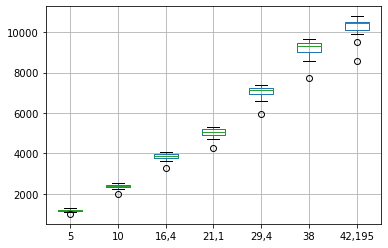

In [295]:
df1.plot.box(grid=True)

<AxesSubplot:>

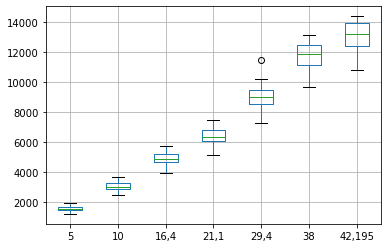

In [297]:
df2.plot.box(grid=True)

From here, I'm going refer to the 29.4k point as the pace separator because it's my point of interest in this study.

In [298]:
# Average speed up to 29,4k in "second/km" among sub-3 runners
sub_three_before = df1['29,4']/29.4
sub_three_before

0     202.925
1     224.558
2     232.993
3      236.19
4     232.959
5     236.837
6     233.401
7     243.129
8     233.401
9     243.707
10     238.81
11    235.544
12    242.925
13    246.633
14    246.122
15    242.789
16    240.034
17    242.925
18    238.946
19    250.102
20    250.136
21    243.401
22    235.034
23    250.136
24    251.429
25    245.782
26     249.83
27    250.238
Name: 29,4, dtype: object

In [217]:
# Average speed after 29,4k in "second/km" among sub-3 runners
sub_three_after = (df1['42,195']-df1['29,4'])/(42.195-29.4)
sub_three_after

0     204.924
1     226.495
2     237.202
3     234.154
4     248.456
5     240.172
6     250.723
7     233.138
8     260.102
9     243.064
10    255.334
11    267.605
12    251.739
13    250.957
14    252.677
15    261.274
16    267.683
17    261.352
18    270.653
19    245.174
20    245.408
21    265.182
22    289.175
23    257.366
24    254.709
25    270.106
26    261.743
27    268.152
dtype: object

In [299]:
# Average speed up to 29,4k in "second/km" among sub-4 runners
sub_four_before = df2['29,4']/29.4
sub_four_before

0      253.163
1      255.612
2      253.061
3      255.068
4      250.272
        ...   
422    328.673
423    336.871
424    336.871
425    340.884
426    345.748
Name: 29,4, Length: 427, dtype: object

In [300]:
# Average speed after 29,4k in "second/km" among sub-4 runners
sub_four_after = (df2['42,195']-df2['29,4'])/(42.195-29.4)
sub_four_after

0      265.494
1      260.805
2      267.761
3      265.807
4      286.127
        ...   
422    369.129
423    350.449
424    350.528
425    341.696
426     330.52
Length: 427, dtype: object

In [301]:
# Statistical test: comparing the before-and-after paces as dependant variables
from scipy import stats
stats.ttest_rel(sub_three_before, sub_three_after)

Ttest_relResult(statistic=-4.734548594370066, pvalue=6.216388697912961e-05)

In [302]:
stats.ttest_rel(sub_four_before, sub_four_after)

Ttest_relResult(statistic=-13.036231807746125, pvalue=6.34613254733525e-33)

Both cases show extremely small p-values with far less than 0.01, therefore at 99% confidence level, average running speed is significantly different before and after 29,4k both in sub-3 and sub-4 runners. (The sub-4 group shows a bigger varience in the average speed difference. So we can still admire the stablity of the sub-3 runners!)

**Average paces**

In [303]:
from statistics import mean 
mean(sub_three_before) # 4:00 m/km pace... how fast

240.03279883381924

In [304]:
mean(sub_three_after) # 4:13 m/km pace... still very fast

252.66845307876957

In [305]:
mean(sub_four_before) # 5:05 m/km pace... not too bad

305.0023897146681

In [306]:
mean(sub_four_after) # 5:24 m/km pace... well, we might have slowed down, but we didn't give up!

324.4314734330685